In [1]:
import numpy as np
import sympy as sp
import numpy.polynomial as P
import matplotlib.pyplot as plt

Polinomios

In [3]:

'''
x = sp.Symbol('x')

a = 2

p = sp.poly(1+2* x +3* x **2)
q = sp.Poly([2,5],x)
p_2 = sp.Poly([3,2,1],x)
p_3 = sp.poly(np.prod(x-np.array([1,2])))

print(p(a))

print(f"El grado es: {p.degree()}")
print(f"El intervalo de raices es: {p.intervals()}")
print(f"Polinimio shifted: {p.shift(a)}")
print(f"Expresión de horner: {sp.horner(p)}")
d,r = sp.div(p,q)
print(f"Dividendo{d}")
print(f"Resto{r}")

print(f"Derivada{p.diff()}")
print(f"Integral{p.integrate()}")

y0 = 4
y1= 2
y2 = 3
print(sp.interpolate([y0, y1, y2],x))

b= 0
f = sp.sin(x)
n = 9
ser = sp.series(f,x,b,n)
print(f"Polinomio de taylor del seno de x: {ser}")
#pol = sp.remove0(ser)
#print(f"polinomio con 0 eliminado: {pol}")


p = P.Polynomial([1,2,3])
print(f"Polinomio: {p}")
p = P.Polynomial.fromroots([1,2])
print(f"Polinomio: {p}")
print(f"Polinomio en punto x = a: {p(a)}")
print(p.coef)
print(p.domain)
print(p.window)

n= 1
a = 0
c = 0
p_int = p.integ(m=n, k=[c]*n)
print(p_int)
print(p.deriv(1))
print(p.basis(2))

'''



'\nx = sp.Symbol(\'x\')\n\na = 2\n\np = sp.poly(1+2* x +3* x **2)\nq = sp.Poly([2,5],x)\np_2 = sp.Poly([3,2,1],x)\np_3 = sp.poly(np.prod(x-np.array([1,2])))\n\nprint(p(a))\n\nprint(f"El grado es: {p.degree()}")\nprint(f"El intervalo de raices es: {p.intervals()}")\nprint(f"Polinimio shifted: {p.shift(a)}")\nprint(f"Expresión de horner: {sp.horner(p)}")\nd,r = sp.div(p,q)\nprint(f"Dividendo{d}")\nprint(f"Resto{r}")\n\nprint(f"Derivada{p.diff()}")\nprint(f"Integral{p.integrate()}")\n\ny0 = 4\ny1= 2\ny2 = 3\nprint(sp.interpolate([y0, y1, y2],x))\n\nb= 0\nf = sp.sin(x)\nn = 9\nser = sp.series(f,x,b,n)\nprint(f"Polinomio de taylor del seno de x: {ser}")\n#pol = sp.remove0(ser)\n#print(f"polinomio con 0 eliminado: {pol}")\n\n\np = P.Polynomial([1,2,3])\nprint(f"Polinomio: {p}")\np = P.Polynomial.fromroots([1,2])\nprint(f"Polinomio: {p}")\nprint(f"Polinomio en punto x = a: {p(a)}")\nprint(p.coef)\nprint(p.domain)\nprint(p.window)\n\nn= 1\na = 0\nc = 0\np_int = p.integ(m=n, k=[c]*n)\nprint(p_i

Base de polinomios de lagrange

In [8]:
fun = lambda x : np.power(x,2)
base = lambda x : np.array ([np.sin(x),np.cos(x),0*x+1,np.log1p(x)])
x = np.array([1,2,3,4])

y = fun(x)
A = base(x)
c= np.linalg.solve(A.T,y)
print("Coeficientes: {}" .format(c))

Coeficientes: [-3.16182935  2.77248401 -7.86571943 14.46781848]


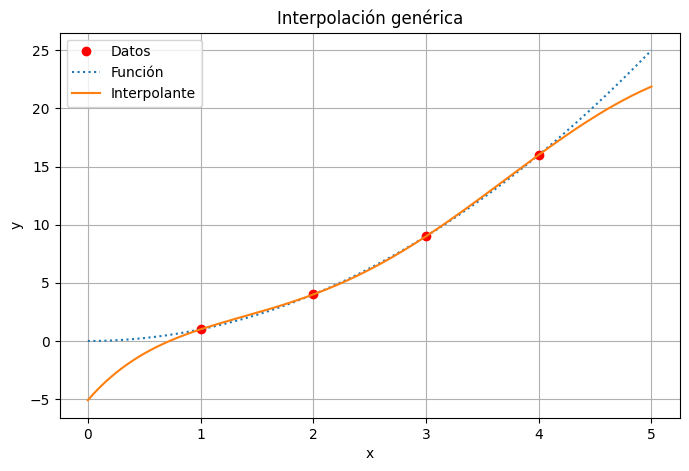

In [9]:
X = np.linspace(0, 5, 201)
Y = np.dot(c, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [11]:
error1 = abs(Y -fun(X))
print("Máximo error de {} en x = {} ".format(error1.max(),X[error1.argmax()]))

idx =  (X>=x[0]) * (X<=x[-1])
error2 = abs(Y[idx] - fun(X[idx]))
print("Máximo error de {} en x = {} ".format(error2.max(),X[error2.argmax()]))

Máximo error de 5.0932354265161175 en x = 0.0 
Máximo error de 0.19624543056554344 en x = 0.375 


Mismo ejemplo cambiando la base

In [17]:
fun = lambda x : np.power(x,2)
base = lambda x : np.array ([0*x+1,x,x**2,x**3])
x = np.array([1,2,3,4])

y = fun(x)
A = base(x)
c= np.linalg.solve(A.T,y)
print("Coeficientes: {}" .format(c))
pol = P.Polynomial(c)
Y = pol(X)
print(f"Polinomio: {pol}")

Coeficientes: [0. 0. 1. 0.]
Polinomio: 0.0 + 0.0 x + 1.0 x**2 + 0.0 x**3


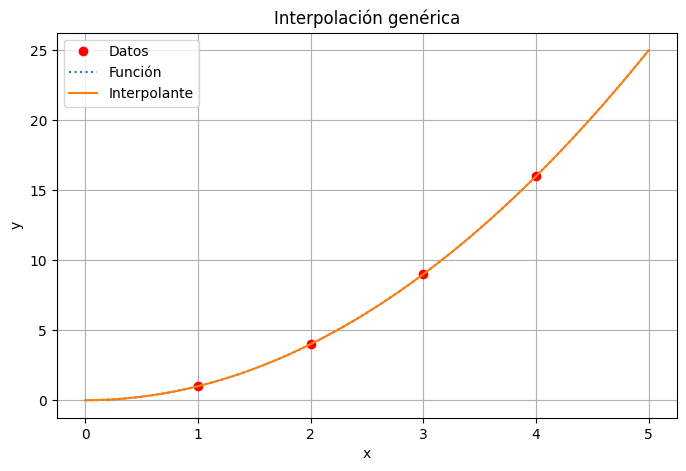

In [13]:
X = np.linspace(0, 5, 201)
Y = np.dot(c, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [18]:
c1 = np.linalg.solve(np.vander(x),y)
print("coeficientes: {}".format(c1))
pol = P.Polynomial(c1)
Y = pol(X)
print(f"Polinomio: {pol}")

coeficientes: [ 0.  1.  0. -0.]
Polinomio: 0.0 + 1.0 x + 0.0 x**2 + -0.0 x**3


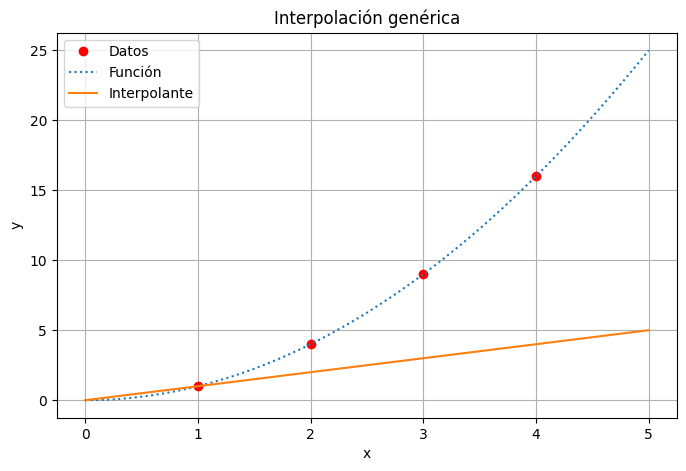

In [15]:
X = np.linspace(0, 5, 201)
Y = np.dot(c1, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()